In [1]:
import os
import sys

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Define the folder path inside Google Drive
drive_folder = "/content/drive/My Drive/scripts"

# Append it to sys.path to allow importing modules
sys.path.append(os.path.abspath(drive_folder))

In [6]:
from optimization import PortfolioOptimization

optimizer = PortfolioOptimization()

In [7]:
# Load data
forecast_data=optimizer.load_asset_data("/content/forecast_combined.csv")

In [8]:
forecast_data.head()

,TSLA,BND,SPY
Date,,,
2024-10-31,178.535295,69.996396,376.146826
2024-11-01,177.300575,69.957360,374.549608
2024-11-02,178.864823,69.982981,374.741260
2024-11-03,177.095152,70.011681,374.081341
2024-11-04,178.938422,70.024876,373.421528


In [9]:
optimizer.calculate_log_returns(forecast_data)

,TSLA,BND,SPY
Date,,,
2024-10-31,NaN,NaN,NaN
2024-11-01,-6.939855e-03,-0.000558,-4.255303e-03
2024-11-02,8.783883e-03,0.000366,5.115563e-04
2024-11-03,-9.943168e-03,0.000410,-1.762551e-03
2024-11-04,1.035456e-02,0.000188,-1.765381e-03
...,...,...,...
2025-10-26,8.861404e-07,0.000000,-1.464957e-08
2025-10-27,-8.595396e-07,0.000000,-1.523172e-08
2025-10-28,7.753889e-07,0.000000,-8.107956e-09


In [10]:
variance=optimizer.calculate_variance(forecast_data)
variance

,0
TSLA,0.030036
BND,0.000012
SPY,0.027342


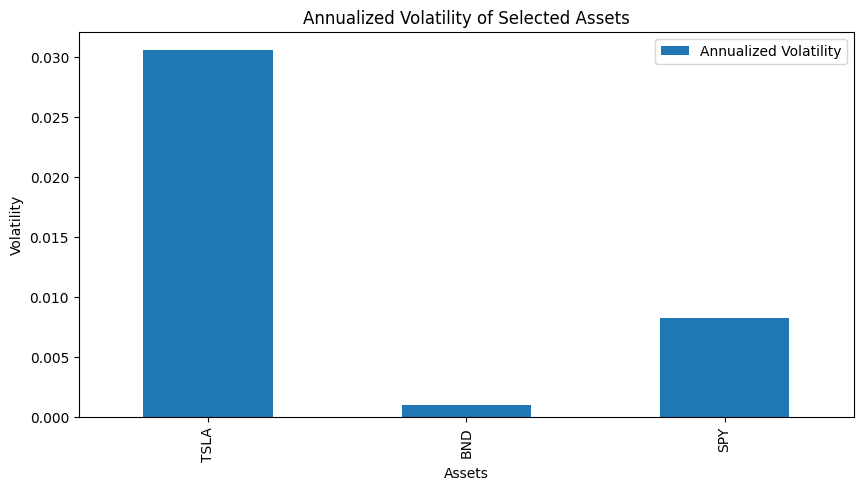

,0
TSLA,2.751183
BND,0.055810
SPY,2.624896


In [11]:
optimizer.calculate_volatility(forecast_data, variance)

# covariance

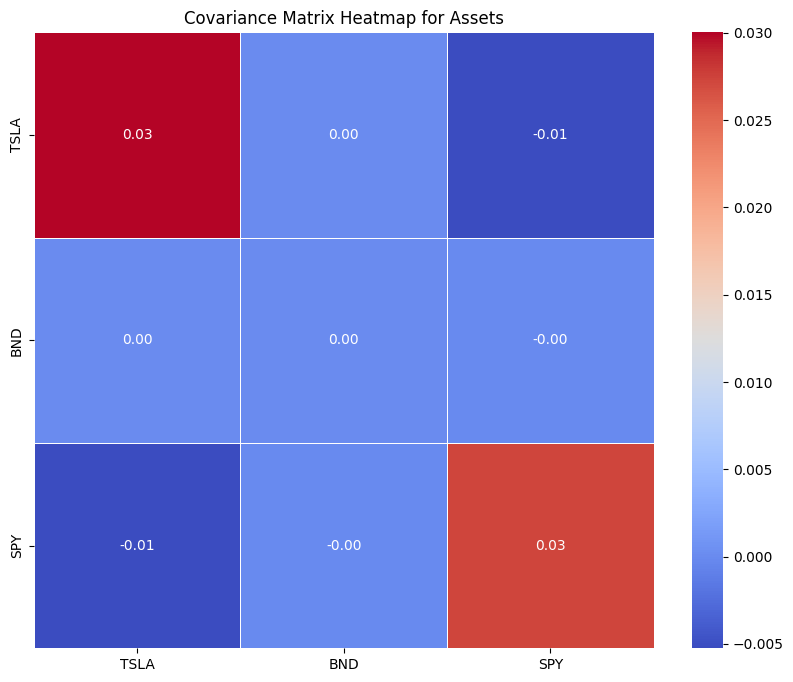

In [12]:
covariance_matrix=optimizer.compute_covariance_matrix(forecast_data)

# correlation

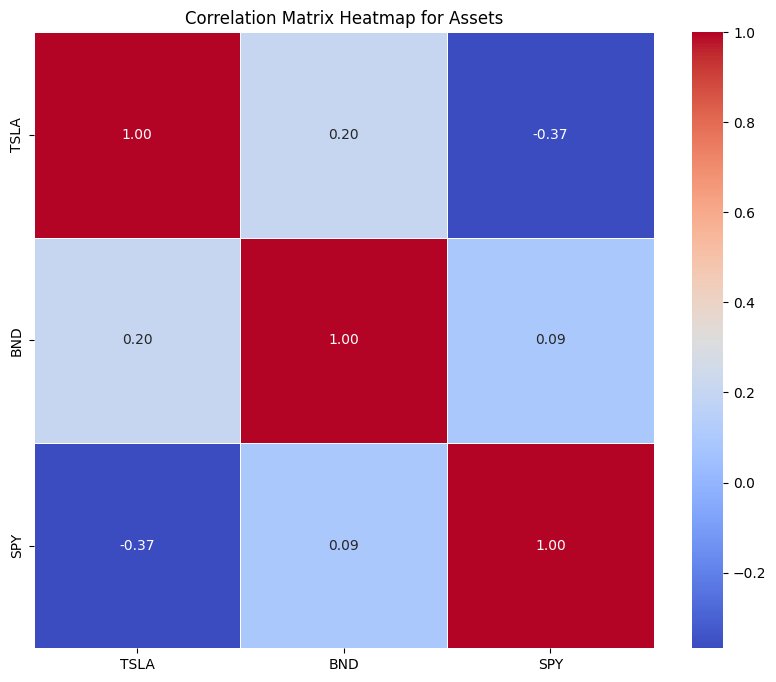

In [13]:
correlation_matrix=optimizer.compute_correlation_matrix(forecast_data)

In [14]:
avg_annual_return, annual_std_dev = optimizer.calculate_annualized_returns(forecast_data)

/content/drive/My Drive/scripts/optimization.py:59: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  avg_annual_return = asset_data.resample('Y').last().pct_change().mean()


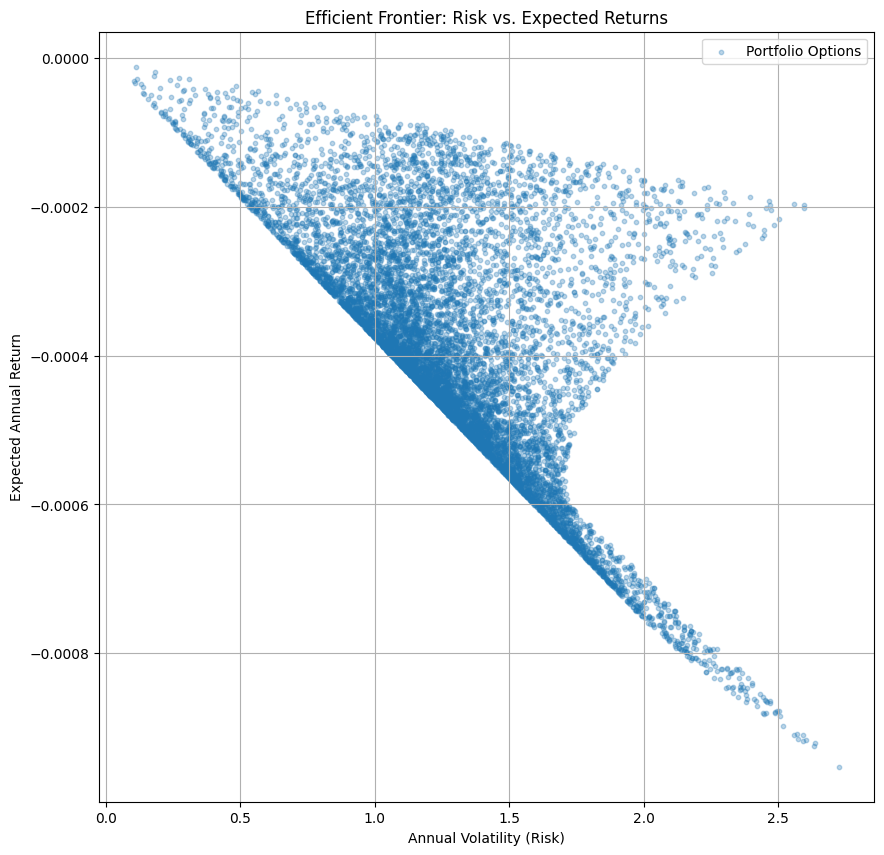

In [15]:
efficient_frontier=optimizer.plot_efficient_frontier(forecast_data, covariance_matrix, avg_annual_return, annual_std_dev)

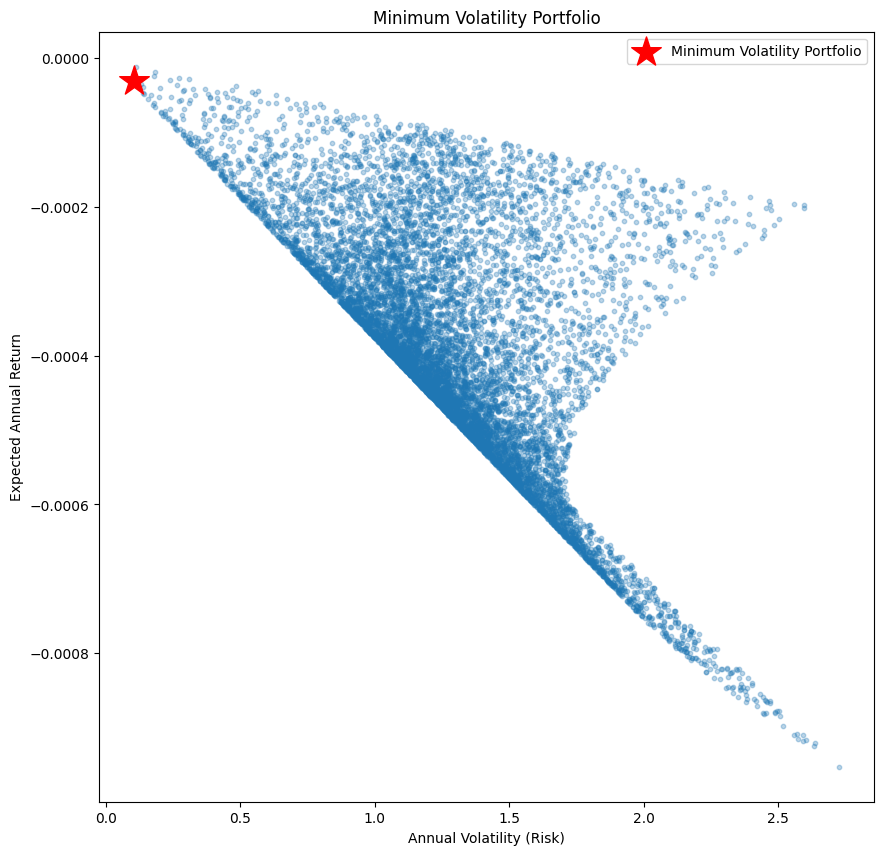

In [16]:
min_vol_portfolio=optimizer.identify_min_volatility_portfolio(efficient_frontier)

In [17]:
min_vol_portfolio

,9743
Return,-0.000031
Volatility,0.105831
TSLA Weight,0.025025
BND Weight,0.946721
SPY Weight,0.028255


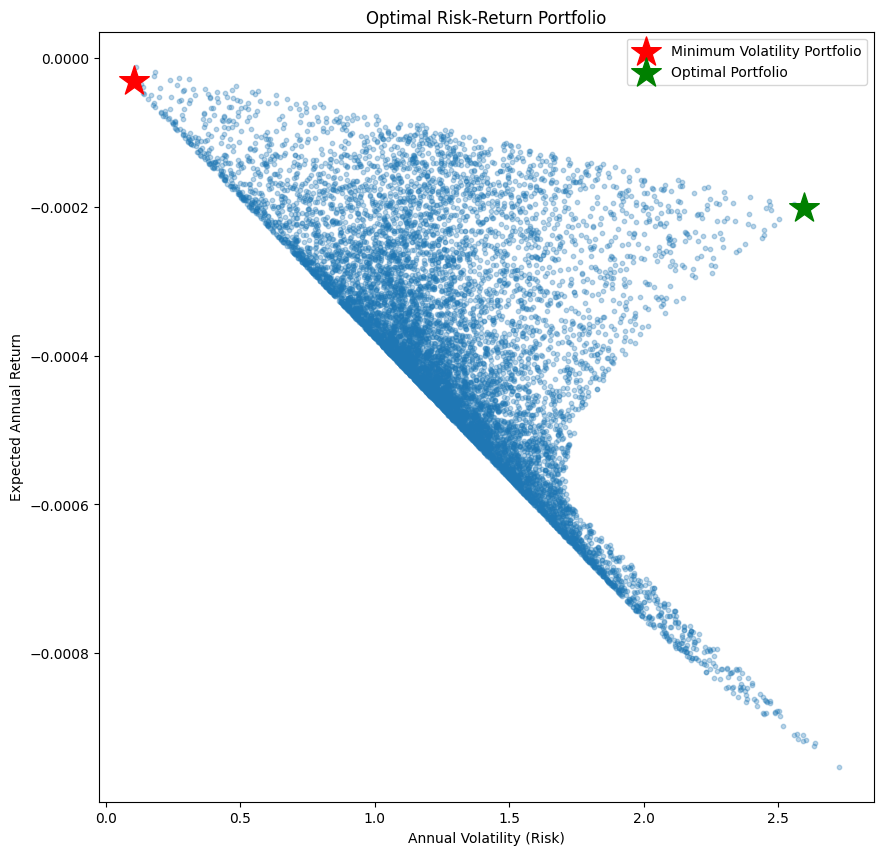

In [18]:
optimal_portfolio=optimizer.identify_optimal_risky_portfolio(efficient_frontier,min_vol_portfolio)

In [19]:
optimal_portfolio

,8249
Return,-0.000202
Volatility,2.596547
TSLA Weight,0.003871
BND Weight,0.002239
SPY Weight,0.993890
